In [3]:
from nilearn import image, connectome, plotting
from nilearn.maskers import NiftiLabelsMasker
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Schaefer100Parcels = image.load_img('parcellation/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm (1).nii')

nifti_dir = 'nifti_files'

In [ ]:
# Only run if recomputing and saving all FC matrices 

for filename in os.listdir(nifti_dir):
    nifti_file = os.path.join(nifti_dir, filename)

    subject_number = filename.split('-')[1].split('_')[0]

    # Create masker and extract time series
    masker = NiftiLabelsMasker(labels_img=Schaefer100Parcels, standardize='zscore_sample')
    time_series = masker.fit_transform(nifti_file)

    # Create correlation matrix
    correlation_measure = connectome.ConnectivityMeasure(kind='correlation', standardize='zscore_sample')
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]

    # Save as numpy file
    output_filename = os.path.join('fc_matrices/', f'fc_matrix_{subject_number}.npy')
    np.save(output_filename, correlation_matrix)

    # Plot the FC plots
    title = f'Functional Connectivity Matrix for subject {subject_number}'
    plot_filename = os.path.join('fc_matrix_plots', f'fc_matrix_plot_{subject_number}.png')
    plotting.plot_matrix(correlation_matrix, colorbar=True, figure=(8, 6), title=title, cmap='coolwarm')
    plt.savefig(plot_filename) 
    plt.close() 
    

In [13]:
# Only run if calculating the averaged FC matrix from already computed npy files

npy_dir = 'fc_matrices'
all_correlation_matrices = []

# Load and accumulate correlation matrices from all npy files
for filename in os.listdir(npy_dir):
    if filename.endswith('.npy'):
        file_path = os.path.join(npy_dir, filename)
        correlation_matrix = np.load(file_path)
        all_correlation_matrices.append(correlation_matrix)

# Compute the average FC matrix across all subjects
average_correlation_matrix = np.mean(all_correlation_matrices, axis=0)

output_filename = os.path.join('fc_matrices/', 'averaged_fc_matrix.npy')
np.save(output_filename, average_correlation_matrix)

title = 'Averaged Functional Connectivity Matrix'
plot_filename = os.path.join('fc_matrix_plots', 'averaged_fc_matrix_plot.png')
plotting.plot_matrix(average_correlation_matrix, colorbar=True, figure=(8, 6), title=title, cmap='coolwarm')
plt.savefig(plot_filename)
plt.close()

In [8]:
# Delete fc matrices of subjects with artificact 

subject_data = pd.read_csv('participants.txt', sep='\t') # tab separated 
artifact_participants = subject_data[subject_data['ghost_NoGhost'] == 'ghost']['participant_id']

artifact_participant_id_list = [pid.split('-')[1] for pid in artifact_participants]
fc_matrix_dir = 'fc_matrices'

for artifact_id in artifact_participant_id_list:
    fc_matrix_file = f'fc_matrix_{artifact_id}.npy'
    fc_matrix_path = os.path.join(fc_matrix_dir, fc_matrix_file)
    
    if os.path.exists(fc_matrix_path):
        os.remove(fc_matrix_path)

In [14]:
# Get IDs of control subjects and schizophrenia subjects

subject_data = pd.read_csv('participants.txt', sep='\t') # tab separated 

control_ids = subject_data[subject_data['diagnosis'] == 'CONTROL']['participant_id']
schiz_ids = subject_data[subject_data['diagnosis'] == 'SCHZ']['participant_id']

control_ids = [pid.split('-')[1] for pid in control_ids]
schiz_ids = [pid.split('-')[1] for pid in schiz_ids]

In [18]:
npy_dir = 'fc_matrices'

# load and accumulate FC matrices for a given list of participant IDs
def load_fc_matrices(participant_ids, npy_dir):
    correlation_matrices = []
    for participant_id in participant_ids:
        file_path = os.path.join(npy_dir, f'fc_matrix_{participant_id}.npy')
        if os.path.exists(file_path):
            correlation_matrix = np.load(file_path)
            correlation_matrices.append(correlation_matrix)
        else:
            print(f'File not found: {file_path}')
    return correlation_matrices

control_correlation_matrices = load_fc_matrices(control_ids, npy_dir) # missing 22 files (I think these were missing files), 108 total 
schiz_correlation_matrices = load_fc_matrices(schiz_ids, npy_dir) # missing 20 files, 30 total

# Compute the average FC matrix for each group
average_control_matrix = np.mean(control_correlation_matrices, axis=0)
average_schiz_matrix = np.mean(schiz_correlation_matrices, axis=0)

np.save(os.path.join(npy_dir, 'average_control_matrix.npy'), average_control_matrix)
np.save(os.path.join(npy_dir, 'average_schiz_matrix.npy'), average_schiz_matrix)

File not found: fc_matrices\fc_matrix_10193.npy
File not found: fc_matrices\fc_matrix_10299.npy
File not found: fc_matrices\fc_matrix_10316.npy
File not found: fc_matrices\fc_matrix_10428.npy
File not found: fc_matrices\fc_matrix_10460.npy
File not found: fc_matrices\fc_matrix_10501.npy
File not found: fc_matrices\fc_matrix_10506.npy
File not found: fc_matrices\fc_matrix_10530.npy
File not found: fc_matrices\fc_matrix_10624.npy
File not found: fc_matrices\fc_matrix_10696.npy
File not found: fc_matrices\fc_matrix_10891.npy
File not found: fc_matrices\fc_matrix_10948.npy
File not found: fc_matrices\fc_matrix_10968.npy
File not found: fc_matrices\fc_matrix_10971.npy
File not found: fc_matrices\fc_matrix_10977.npy
File not found: fc_matrices\fc_matrix_11050.npy
File not found: fc_matrices\fc_matrix_11052.npy
File not found: fc_matrices\fc_matrix_11082.npy
File not found: fc_matrices\fc_matrix_11098.npy
File not found: fc_matrices\fc_matrix_11121.npy
File not found: fc_matrices\fc_matrix_11

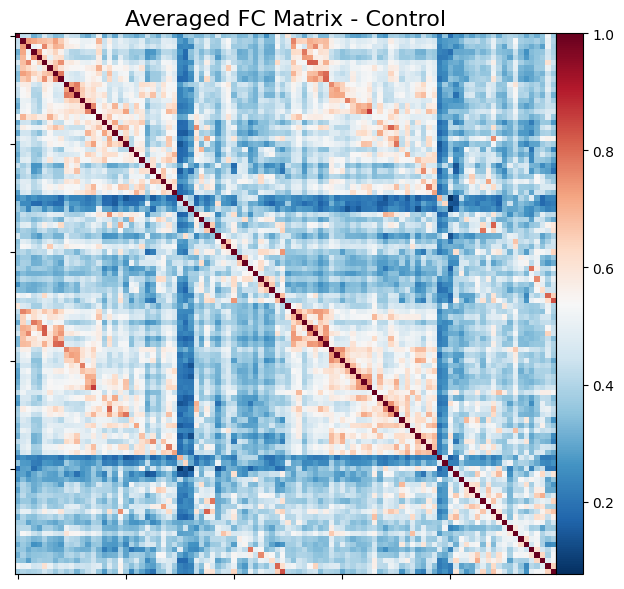

In [20]:
plotting.plot_matrix(average_control_matrix, colorbar=True, figure=(8, 6), title='Averaged FC Matrix - Control')
plt.show()
plt.close()

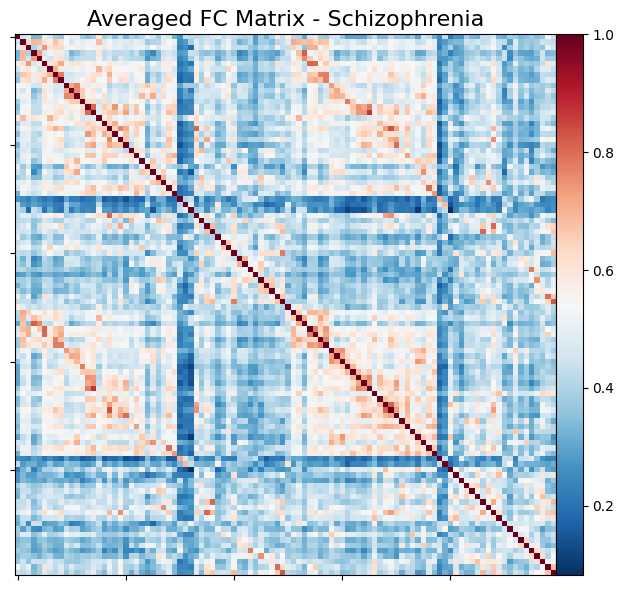

In [21]:
plotting.plot_matrix(average_schiz_matrix, colorbar=True, figure=(8, 6), title='Averaged FC Matrix - Schizophrenia')
plt.show()
plt.close()

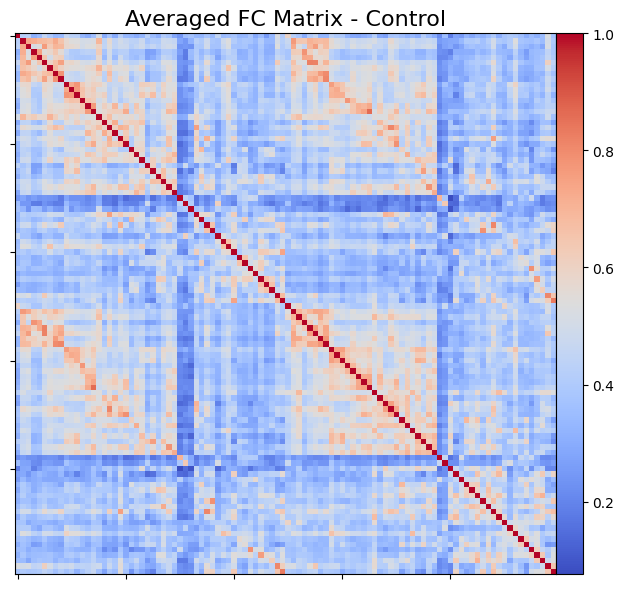

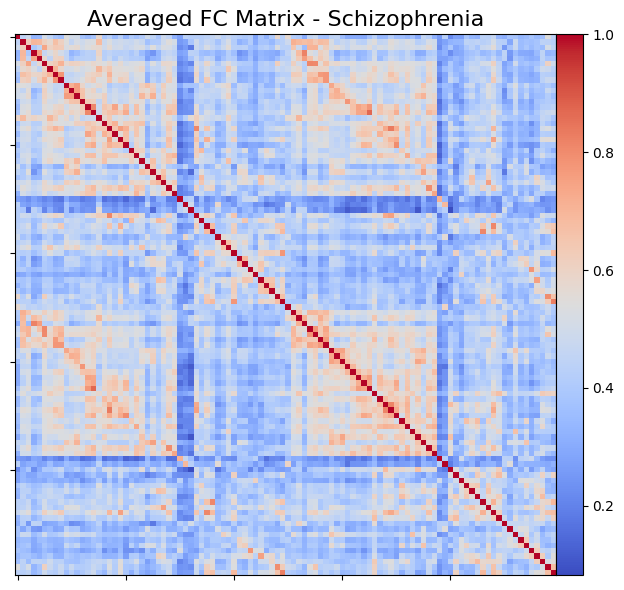

In [6]:
plotting.plot_matrix(average_control_matrix, colorbar=True, figure=(8, 6), title='Averaged FC Matrix - Control', cmap='coolwarm')
plt.show()
plt.close()

plotting.plot_matrix(average_schiz_matrix, colorbar=True, figure=(8, 6), title='Averaged FC Matrix - Schizophrenia', cmap='coolwarm')
plt.show()
plt.close()